# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

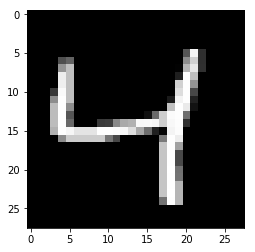

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
imshape = mnist.train.images.shape[1]
inputs_ = tf.placeholder(tf.float32, (None, imshape), name="inputs") 
targets_ = tf.placeholder(tf.float32, (None, imshape), name="targets") 

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, imshape)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6948
Epoch: 1/20... Training loss: 0.6912
Epoch: 1/20... Training loss: 0.6880
Epoch: 1/20... Training loss: 0.6843
Epoch: 1/20... Training loss: 0.6799
Epoch: 1/20... Training loss: 0.6748
Epoch: 1/20... Training loss: 0.6685
Epoch: 1/20... Training loss: 0.6619
Epoch: 1/20... Training loss: 0.6525
Epoch: 1/20... Training loss: 0.6418
Epoch: 1/20... Training loss: 0.6308
Epoch: 1/20... Training loss: 0.6175
Epoch: 1/20... Training loss: 0.6036
Epoch: 1/20... Training loss: 0.5924
Epoch: 1/20... Training loss: 0.5741
Epoch: 1/20... Training loss: 0.5581
Epoch: 1/20... Training loss: 0.5347
Epoch: 1/20... Training loss: 0.5223
Epoch: 1/20... Training loss: 0.5058
Epoch: 1/20... Training loss: 0.4857
Epoch: 1/20... Training loss: 0.4656
Epoch: 1/20... Training loss: 0.4494
Epoch: 1/20... Training loss: 0.4287
Epoch: 1/20... Training loss: 0.4169
Epoch: 1/20... Training loss: 0.3997
Epoch: 1/20... Training loss: 0.3860
Epoch: 1/20... Training loss: 0.3746
E

Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1998
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1955
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1836
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1868
E

Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1628
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1601
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1608
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1628
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1628
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1634
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1650
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1594
Epoch: 2/20... Training loss: 0.1538
E

Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1415
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1427
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1432
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1469
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1359
E

Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1285
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1288
Epoch: 4/20... Training loss: 0.1327
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1280
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1252
E

Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1160
E

Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1099
E

Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1104
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1067
E

Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1061
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1043
E

Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1069
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1011
E

Epoch: 8/20... Training loss: 0.0938
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1033
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0959
E

Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1015
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0922
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0977
E

Epoch: 10/20... Training loss: 0.1000
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.1013
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0993
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0901
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0989
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0994
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0984
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0883
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0976
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0891
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0885
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

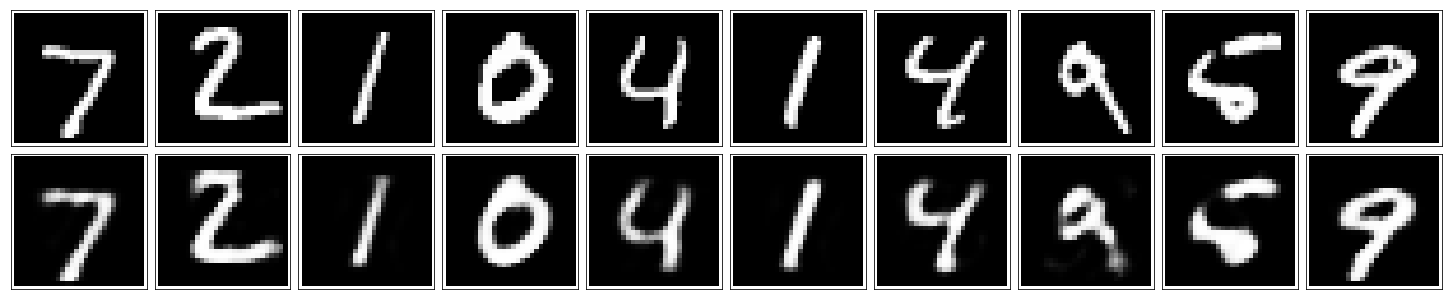

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.